In [16]:
import numpy as np
from random_solver import RandomSolver
from evaluate import evaluate, visualize

# Number of iterations for averaging results of experiments with randomness
ITERATIONS = 25

Example results of random solver

Points earned: 182


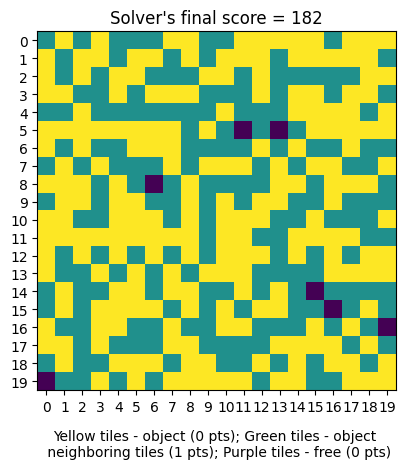

In [17]:
rand_solver = RandomSolver()
solution = rand_solver.solve()
print(f"Points earned: {evaluate(solution)}")
visualize(solution)

Average performance of a random solver

In [18]:
scores = []
for i in range(ITERATIONS):
    solution = rand_solver.solve()
    scores.append(evaluate(solution))
print(f"Average points earned: {np.mean(scores)}")


Average points earned: 184.44


Example results of standard genetic algorythm solver

In [19]:
from genetic_solver import GeneticSolver
import matplotlib.pyplot as plt

T_MAX = 400
MU = 2000
PC = 0.6
PM = 0.001
gen_solver = GeneticSolver(T_MAX, MU, PC, PM)

In [20]:
scores = []
for _ in range(ITERATIONS):
    p, q, score_convergence = gen_solver.solve(rand_solver, evaluate, False)
    scores.append(q)


Avg points earned (25 iterations): 238.72


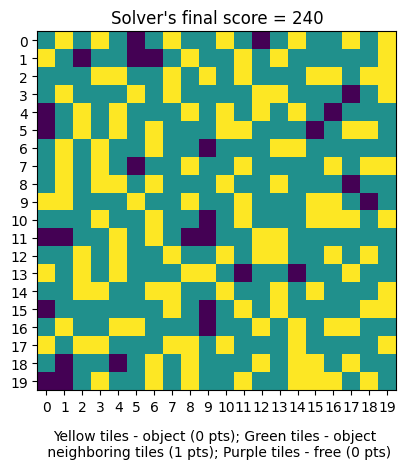

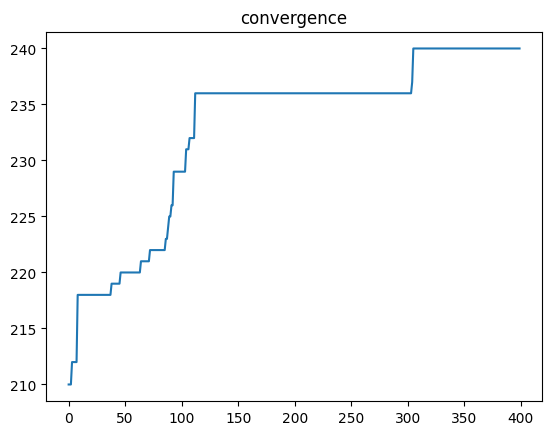

In [21]:
print(f"Avg points earned ({ITERATIONS} iterations): {np.mean(scores)}")

visualize(p)
plt.plot(range(len(score_convergence)), score_convergence) # from last iteration
plt.title("convergence")
plt.show()

In [22]:
scores = []
for _ in range(ITERATIONS):
    p, q, score_convergence = gen_solver.solve(rand_solver, evaluate, True)
    scores.append(q)

Avg points earned (25 iterations): 290.76


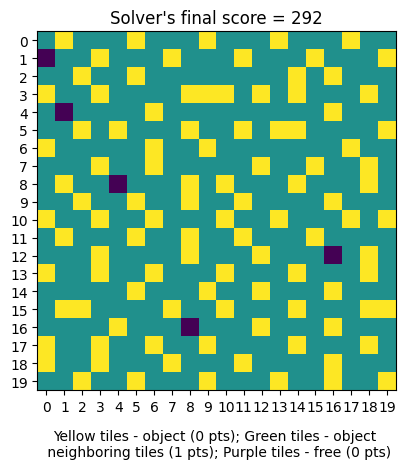

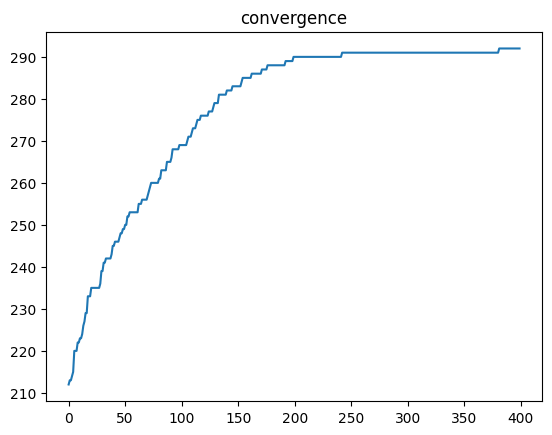

In [23]:
print(f"Avg points earned ({ITERATIONS} iterations): {np.mean(scores)}")

visualize(p)
plt.plot(range(len(score_convergence)), score_convergence)
plt.title("convergence")
plt.show()

In [24]:
PMS = [0.2, 0.1, 0.05, 0.01, 0.001, 0.0005, 0.0001]
means = []
for pm in PMS:
    gen_solver = GeneticSolver(T_MAX, MU, PC, pm)
    scores = []
    for _ in range(ITERATIONS):
        p, q, convergence = gen_solver.solve(rand_solver, evaluate, True)
        scores.append(q)
    means.append(np.mean(scores))
    

In [25]:
for i in range(len(means)):
    print(f"pm = {PMS[i]}: mean = {means[i]}")

pm = 0.2: mean = 220.56
pm = 0.1: mean = 222.88
pm = 0.05: mean = 227.92
pm = 0.01: mean = 248.52
pm = 0.001: mean = 290.6
pm = 0.0005: mean = 290.08
pm = 0.0001: mean = 285.28


Manually found best solution

304


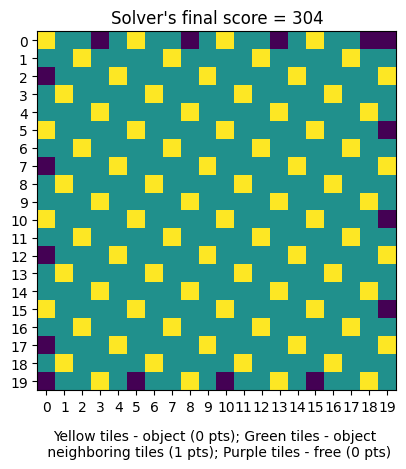

In [45]:
import numpy as np
from evaluate import *

solution = np.zeros(400)
size = 20
off = 0
for row in range(size):
    for col in range(size):
        if (col+off) % 5 == 0:
            solution[row*size+col] = 1
    off += 3


print(evaluate(solution))
visualize(solution)

Checking for vectors of different size

Points earned: 60


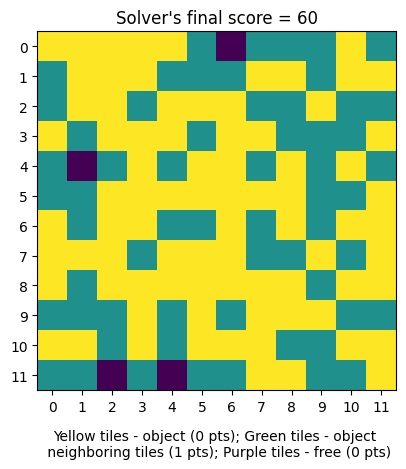

In [37]:
import numpy as np
from random_solver import RandomSolver
from evaluate import evaluate, visualize

SIZE = 12

rand_solver = RandomSolver(SIZE)
solution = rand_solver.solve()
print(f"Points earned: {evaluate(solution, SIZE)}")
visualize(solution, SIZE)

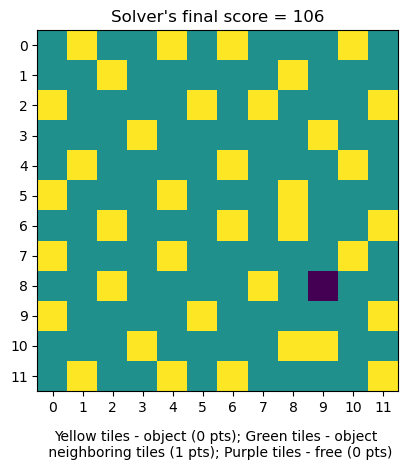

In [1]:
from genetic_solver import GeneticSolver
from random_solver import RandomSolver
from evaluate import evaluate, visualize
SIZE = 12
rand_solver = RandomSolver(SIZE)

T_MAX = 100
MU = 200
PC = 0.6
PM = 0.001
gen_solver = GeneticSolver(T_MAX, MU, PC, PM)
p, _, _ = gen_solver.solve(rand_solver, evaluate, True)
visualize(p, SIZE)